In [2]:
import requests
import cv2
from matplotlib import pyplot as plt 
import numpy as  np

from utils import *

## Edge detection using custom kernel

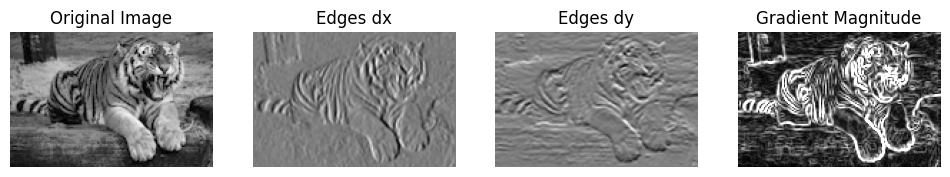

In [2]:
# Read the image
image = cv2.imread('data/images/tiger.jpg', cv2.IMREAD_GRAYSCALE)

# Define a custom kernel for edge detection (Sobel operator)
kernelx = np.array([[-1, 0, 1],             # pixels on the right of the 0 column will be highlighted/more exaggerated
                   [-2, 0, 2],              # pixels on the left of the 0 column will be suppressed
                   [-1, 0, 1]])

kernely = np.array([[-1, -2, -1],
                   [0, 0, 0],
                   [1, 2, 1]])

# Apply the custom kernel using convolution
edgesx = cv2.filter2D(image, cv2.CV_32F, kernelx)           # vertical edges
edgesy = cv2.filter2D(image, cv2.CV_32F, kernely)           # horizontal edges
                                                            # output must be a float (32F or 64F are both fine)
magnitude = np.sqrt(edgesx**2 + edgesy**2).astype(np.uint)

# Display the original image and the edges obtained with the custom kernel
plt.figure(figsize=(12, 10))
plt.subplot(141), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.axis('off')
plt.subplot(142), plt.imshow(edgesx, cmap='gray')
plt.title('Edges dx'), plt.axis('off')
plt.subplot(143), plt.imshow(edgesy, cmap='gray')
plt.title('Edges dy'), plt.axis('off')
plt.subplot(144), plt.imshow(magnitude, cmap='gray', vmin=0, vmax=360)
plt.title('Gradient Magnitude'), plt.axis('off')

plt.show()

## Edge detection using Sobel operator

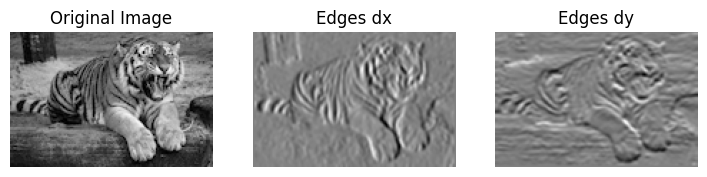

In [7]:
# Read the image
image = cv2.imread('data/images/tiger.jpg', cv2.IMREAD_GRAYSCALE)

# Apply the Sobel Edge Detection 
sobelx = cv2.Sobel(src=image, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=5)   # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=image, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=5)   # Sobel Edge Detection on the Y axis
#sobelxy = cv2.Sobel(src=image, ddepth=cv2.CV_8U, dx=1, dy=1, ksize=3)

# Display the original image and the edges side by side
plt.figure(figsize=(12, 10))
plt.subplot(141), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.axis('off')
plt.subplot(142), plt.imshow(sobelx, cmap='gray')
plt.title('Edges dx'), plt.axis('off')
plt.subplot(143), plt.imshow(sobely, cmap='gray')
plt.title('Edges dy'), plt.axis('off')
#plt.subplot(144), plt.imshow(sobelxy, cmap='gray')
#plt.title('Sobelxy'), plt.axis('off')


plt.show()

## Edge detection in Noisy images

(Text(0.5, 1.0, 'Edges dy'), (-0.5, 99.5, 99.5, -0.5))

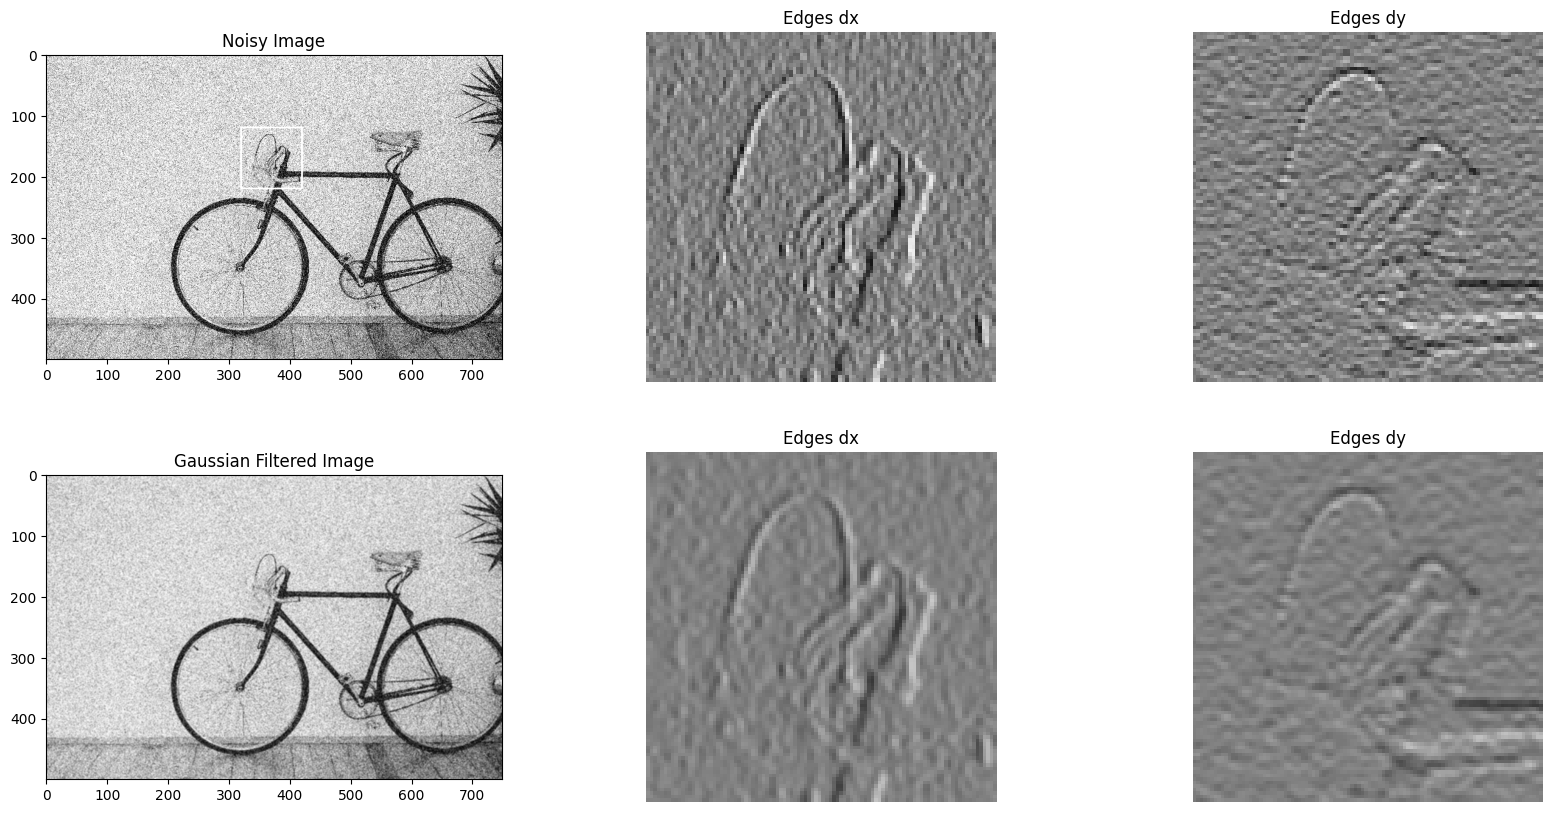

In [4]:
# Read the image
image = getImage('https://images.pexels.com/photos/276517/pexels-photo-276517.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.resize(image, (int(image.shape[1]/3), int(image.shape[0]/3)), interpolation=cv2.INTER_LINEAR)   # resize to 1/3 of its original size
noisy_image = gaussian_noise(image, sigma=50)
gaussian_filtered_image = cv2.GaussianBlur(noisy_image, ksize=(3,3), sigmaX = 1, sigmaY = 1)                # apply Gaussian filtering first


# Apply the sobel edge detection
edgesx = cv2.filter2D(noisy_image, cv2.CV_32F, kernelx)
edgesy = cv2.filter2D(noisy_image, cv2.CV_32F, kernely)

gedgesx = cv2.filter2D(gaussian_filtered_image, cv2.CV_32F, kernelx)
gedgesy = cv2.filter2D(gaussian_filtered_image, cv2.CV_32F, kernely)


x1, y1, x2, y2 = 320, 120, 420, 220
# Draw a red rectangular box on the image
cv2.rectangle(noisy_image, (x1, y1), (x2, y2), (255, 0, 0), 2) 

# Display the original image and the edges side by side
plt.figure(figsize=(20, 10))
plt.subplot(231), plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image'), 
plt.subplot(232), plt.imshow(edgesx[y1:y2, x1:x2], cmap='gray', vmin=-1000, vmax=1000)
plt.title('Edges dx'), plt.axis('off')
plt.subplot(233), plt.imshow(edgesy[y1:y2, x1:x2], cmap='gray', vmin=-1000, vmax=1000)
plt.title('Edges dy'), plt.axis('off')

plt.subplot(234), plt.imshow(gaussian_filtered_image, cmap='gray')
plt.title('Gaussian Filtered Image'), 
plt.subplot(235), plt.imshow(gedgesx[y1:y2, x1:x2], cmap='gray', vmin=-1000, vmax=1000)
plt.title('Edges dx'), plt.axis('off')
plt.subplot(236), plt.imshow(gedgesy[y1:y2, x1:x2], cmap='gray', vmin=-1000, vmax=1000)
plt.title('Edges dy'), plt.axis('off')

**Note:** The OpenCV Sobel operators (```cv.Sobel```) combine Gaussian smoothing and differentiation, so the result is more or less resistant to the noise. 

## Canny Edge Detector

(Text(0.5, 1.0, 'Canny Edges'), (-0.5, 2248.5, 1499.5, -0.5))

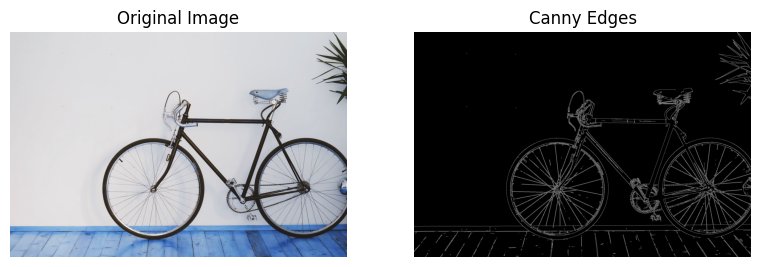

In [5]:
# Read the image
image = getImage('https://images.pexels.com/photos/276517/pexels-photo-276517.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2')

# Apply the Canny edge detector
edges = cv2.Canny(image, 150, 250)       # 150 and 250 are the thresholds for detecting the edge
                                         # if the edge > 250 --> strong edge
                                         # if 150 < edge < 250 --> weak edge
                                         # if edge < 150 --> not an edge
                                         # strong edges are edges and weak edges are edges iff they're connected to strong ones

# Display the original image and the edges side by side
plt.figure(figsize=(20, 10))
plt.subplot(141), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.axis('off')
plt.subplot(142), plt.imshow(edges, cmap='gray')
plt.title('Canny Edges'), plt.axis('off')